# Basics #
## 2. Instruments and pricing engines ##

### Setup ###

In [1]:
import QuantLib as ql

In [2]:
today = ql.Date(7, ql.March, 2014)
ql.Settings.instance().evaluationDate = today

### The instrument ###

In [3]:
option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, 100.0), 
                           ql.EuropeanExercise(ql.Date(7, ql.June, 2014)))

### First pricing method: analytic Black-Scholes formula ###

In [4]:
u = ql.SimpleQuote(100.0)
r = ql.SimpleQuote(0.01)
sigma = ql.SimpleQuote(0.20)

In [5]:
riskFreeCurve = ql.FlatForward(0, ql.TARGET(), ql.QuoteHandle(r), ql.Actual360())
volatility = ql.BlackConstantVol(0, ql.TARGET(), ql.QuoteHandle(sigma), ql.Actual360())

In [6]:
process = ql.BlackScholesProcess(ql.QuoteHandle(u), 
                                 ql.YieldTermStructureHandle(riskFreeCurve), 
                                 ql.BlackVolTermStructureHandle(volatility))

In [7]:
engine = ql.AnalyticEuropeanEngine(process)

In [8]:
option.setPricingEngine(engine)

In [9]:
print(option.NPV())

4.155543462156206


In [10]:
print(option.delta())
print(option.gamma())
print(option.vega())

0.5302223303784392
0.03934493301271913
20.109632428723106


### Market changes ###

In [11]:
u.setValue(105.0)
print(option.NPV())

7.27556357927846


In [12]:
import matplotlib.pyplot as plot
import numpy
from IPython.display import display

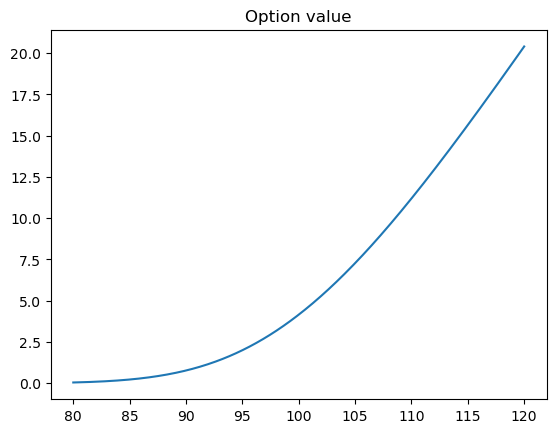

In [13]:
f, ax = plot.subplots()
xs = numpy.linspace(80.0, 120.0, 400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title('Option value')
_ = ax.plot(xs, ys)

In [14]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [15]:
print(option.NPV())

7.27556357927846


In [16]:
r.setValue(0.03)

In [17]:
print(option.NPV())

7.624029148527754


In [18]:
sigma.setValue(0.25)

In [19]:
print(option.NPV())

8.531296969971573


### Date changes ###

In [20]:
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)
print(option.NPV())

7.27556357927846


In [21]:
ql.Settings.instance().evaluationDate = ql.Date(7, ql.April, 2014)

In [22]:
print(option.NPV())

6.560073820974377


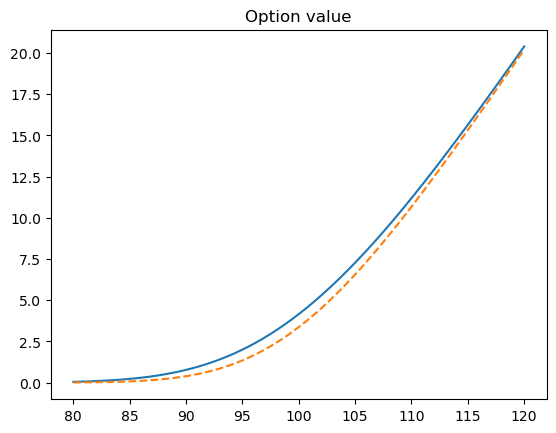

In [23]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs, ys, '--')
display(f)

In [24]:
ql.Settings.instance().evaluationDate = ql.Date(7, ql.June, 2014)

In [25]:
print(option.NPV())

0.0


### Other pricing methods ###

In [26]:
ql.Settings.instance().evaluationDate = today
u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)

In [27]:
print(option.NPV())

7.27556357927846


In [28]:
model = ql.HestonModel(ql.HestonProcess(ql.YieldTermStructureHandle(riskFreeCurve),
                                        ql.YieldTermStructureHandle(ql.FlatForward(0, ql.TARGET(), 0.0, ql.Actual360())),
                                        ql.QuoteHandle(u), 0.04, 0.1, 0.01, 0.05, -0.75))

In [29]:
engine = ql.AnalyticHestonEngine(model)
option.setPricingEngine(engine)

In [30]:
print(option.NPV())

7.295356086978643


### Lazy recalculation ###

In [31]:
engine = ql.MCEuropeanEngine(process, "PseudoRandom", timeSteps=20, requiredSamples=250000)
option.setPricingEngine(engine)

In [32]:
%time print(option.NPV())

7.2715337086092395
CPU times: total: 1.92 s
Wall time: 1.97 s


In [33]:
%time print(option.NPV())

7.2715337086092395
CPU times: total: 0 ns
Wall time: 1e+03 µs


In [34]:
u.setValue(104.0)

In [35]:
%time print(option.NPV())

6.607295537390783
CPU times: total: 1.95 s
Wall time: 1.99 s
